# I COVID Data Visualization
1. Download COVID case and death count data from CDC.gov (https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36). 
<br>
<br>
2. Plot the total number of cases vs total number of deaths per state. Do you observe a relationship between these variables? Attempt to fit this data to a) linear function, to b) a polynomial function.  Generate a plot for each fit: with original data and linear fit, and polynomial fit.  What are the fit errors? Discuss. 
<br>
<br>
3. Plot the number of new cases per state corresponding to the most recent day, in descending order.  
<br>
<br>
4. Consider data for the following states: Washington, Kentucky, Georgia, and California.
<br>
<br>
    a) Plot new cases over time.
<br>
<br>
    b) Plot total cases over time.
<br>
<br>
    c) Find population count for each state and normalize new cases data and total cases data. Replot a) and b).
<br>
<br>
    d) Discuss the results. 

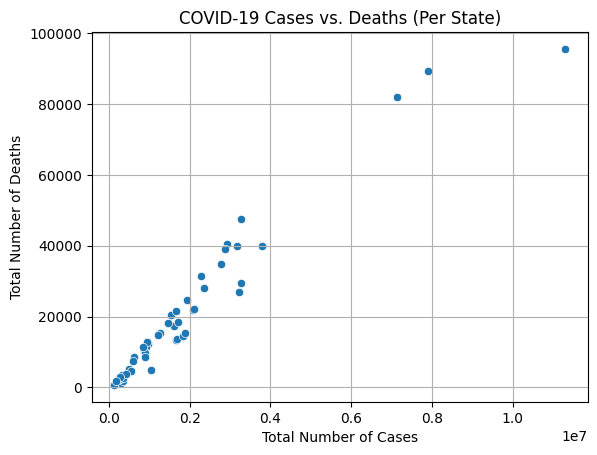

In [1]:
### Question 2 ###
# Packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# List of US states
states = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
          'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
          'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
          'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
          'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
# Read CSV file
data = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
df = data.copy()
# Convert 'submission_date' to datatime
df['submission_date'] = pd.to_datetime(df['submission_date'])
# Keep only the latest submission for all US states (this includes US territories)
df = df.sort_values(['state', 'submission_date']).drop_duplicates('state', keep = 'last')
# Keep only US states
df = df.loc[df['state'].isin(states)]
# Plot data
sns.scatterplot(data = df, x = 'tot_cases', y = 'tot_death').set(title = 'COVID-19 Cases vs. Deaths (Per State)',
                                                                 xlabel = 'Total Number of Cases',
                                                                 ylabel = 'Total Number of Deaths')
plt.grid(True)
plt.show()

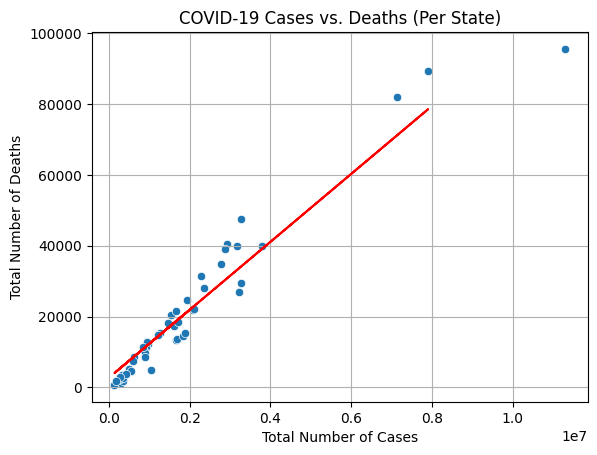

Fit error (RMSE): 5239.79


In [2]:
### Question 2(a) ###
# Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Isolate data
tot_cases_X = df.loc[:,'tot_cases'].values.reshape(-1, 1)
tot_death_Y = df.loc[:,'tot_death'].values.reshape(-1, 1)
# Split the data into training/testing sets
tot_cases_X_train = tot_cases_X[:-10]
tot_cases_X_test = tot_cases_X[-10:]
# Split the data into training/testing sets
tot_death_Y_train = tot_death_Y[:-10]
tot_death_Y_test = tot_death_Y[-10:]
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(tot_cases_X_train, tot_death_Y_train)
# Make prediction using the testing set
tot_death_Y_pred = regr.predict(tot_cases_X_test)
# Plot data
sns.scatterplot(data = df, x = 'tot_cases', y = 'tot_death').set(title = 'COVID-19 Cases vs. Deaths (Per State)',
                                                                 xlabel = 'Total Number of Cases',
                                                                 ylabel = 'Total Number of Deaths')
plt.plot(tot_cases_X_test, tot_death_Y_pred, color = 'red')
plt.grid(True)
plt.show()
# Print RMSE
print("Fit error (RMSE): %.2f" % np.sqrt(mean_squared_error(tot_death_Y_test, tot_death_Y_pred)))

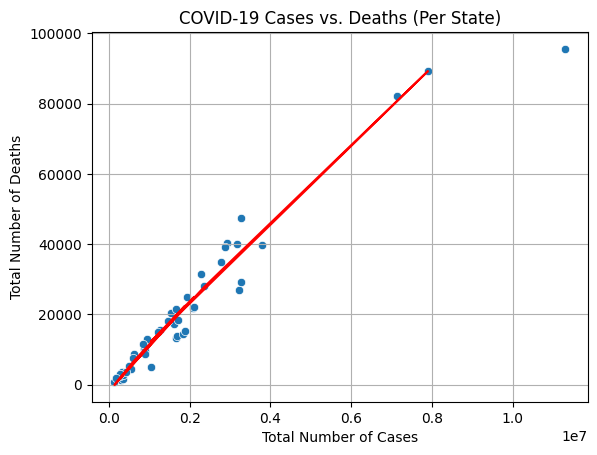

Fit error (RMSE): 4140.04


In [3]:
### Question 2(b) ###
# Packages
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Create polynomial interpolation object
model = make_pipeline(PolynomialFeatures(4), Ridge(alpha = 1e-3))
# Train the model using the training sets
model.fit(tot_cases_X_train, tot_death_Y_train)
# Make predictions using the testing set
tot_death_Y_pred = model.predict(tot_cases_X_test)
# Plot data
sns.scatterplot(data = df, x = 'tot_cases', y = 'tot_death').set(title = 'COVID-19 Cases vs. Deaths (Per State)',
                                                                 xlabel = 'Total Number of Cases',
                                                                 ylabel = 'Total Number of Deaths')
plt.plot(tot_cases_X_test, tot_death_Y_pred, color = 'red')
plt.grid(True)
plt.show()
# Print RMSE
print("Fit error (RMSE): %.2f" % np.sqrt(mean_squared_error(tot_death_Y_test, tot_death_Y_pred)))

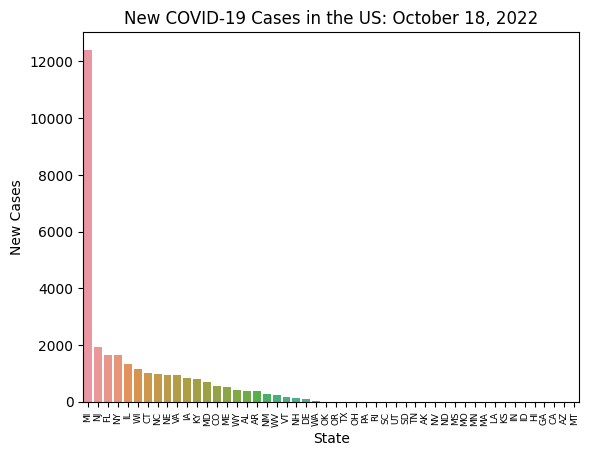

In [4]:
### Question 3 ###
df.sort_values('new_case', ascending = False, inplace = True)
sns.barplot(data = df, x = 'state', y = 'new_case').set(title = 'New COVID-19 Cases in the US: October 18, 2022',
                                                        xlabel = 'State',
                                                        ylabel = 'New Cases')
plt.xticks(fontsize = 6.5, rotation = 90)
plt.show()

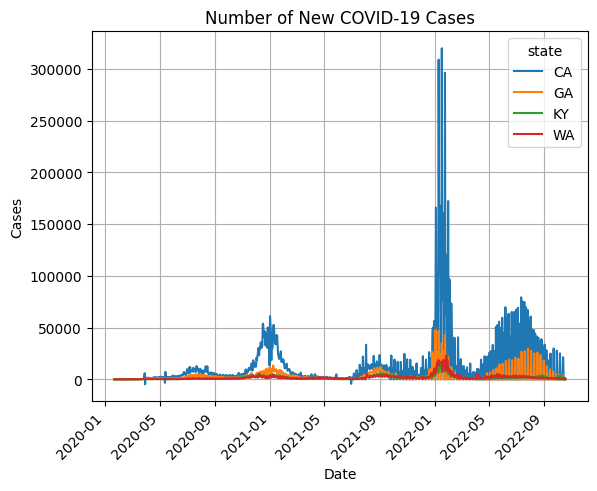

In [5]:
### Question 4(a) ###
# Grab a fresh copy of the data
df = data.copy()
# Convert 'submission_date' to datatime
df['submission_date'] = pd.to_datetime(df['submission_date'])
# Keep only WA, KY, GA, CA
df = df.loc[df['state'].isin(['WA', 'KY', 'GA', 'CA'])]
# Sort by state (this is to clean up the final plot)
df = df.sort_values(['state', 'submission_date'])
# Plot data
sns.lineplot(data = df, x = 'submission_date', y = 'new_case', hue = 'state').set(title = 'Number of New COVID-19 Cases',
                                                                                  xlabel = 'Date',
                                                                                  ylabel = 'Cases')
plt.xticks(rotation = 45, ha = "right")
plt.grid(True)
plt.show()

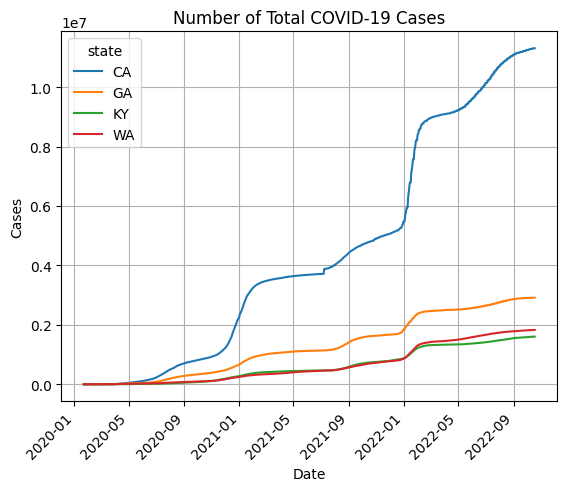

In [6]:
### Question 4(b) ###
# Plot data
sns.lineplot(data = df, x = 'submission_date', y = 'tot_cases', hue = 'state').set(title = 'Number of Total COVID-19 Cases',
                                                                                   xlabel = 'Date',
                                                                                   ylabel = 'Cases')
plt.xticks(rotation = 45, ha = "right")
plt.grid(True)
plt.show()

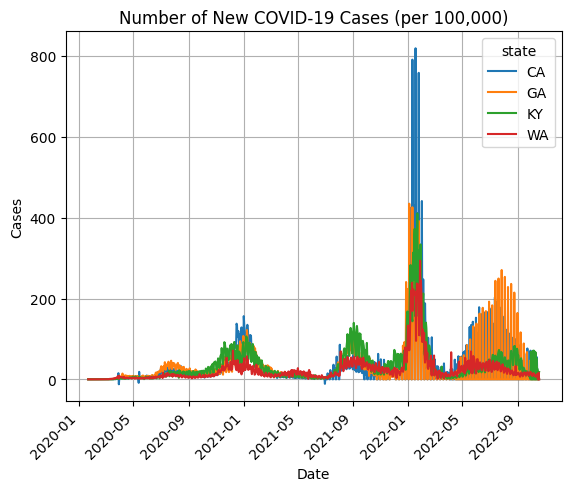

In [7]:
### Question 4(c) part 1 ###
# Normalizing function
def func(preNorm, state):
    popSize = {'WA':7785786, 'KY':4512310 , 'GA':10912876, 'CA':39029342}
    return (preNorm / popSize[state]) * 100000
# Normalize new cases data (using "per 100,000")
df['new_case_norm'] = df.apply(lambda x: func(x['new_case'], x['state']), axis=1)
# Plot data
sns.lineplot(data = df, x = 'submission_date', y = 'new_case_norm', hue = 'state').set(title = 'Number of New COVID-19 Cases (per 100,000)',
                                                                                       xlabel = 'Date',
                                                                                       ylabel = 'Cases')
plt.xticks(rotation = 45, ha = "right")
plt.grid(True)
plt.show()

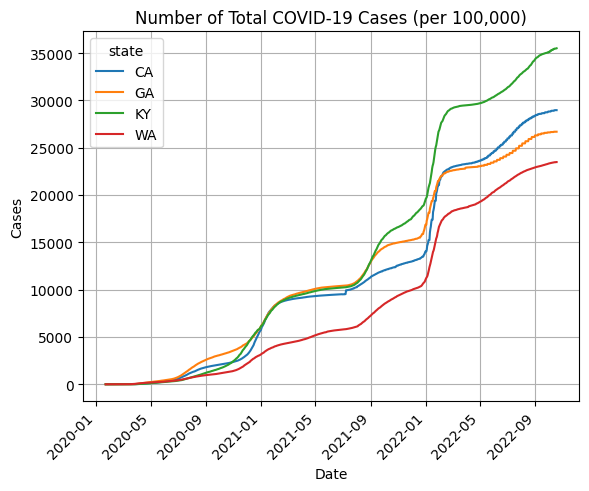

In [8]:
### Question 4(c) part 2 ###
# Normalize total cases data (using "per 100,000")
df['tot_cases_norm'] = df.apply(lambda x: func(x['tot_cases'], x['state']), axis=1)
# Plot data
sns.lineplot(data = df, x = 'submission_date', y = 'tot_cases_norm', hue = 'state').set(title = 'Number of Total COVID-19 Cases (per 100,000)',
                                                                                       xlabel = 'Date',
                                                                                       ylabel = 'Cases')
plt.xticks(rotation = 45, ha = "right")
plt.grid(True)
plt.show()

# II Gene expression differences between normal ovary tissue and ovarian cancer biopsies
Gene expression is the process by which information from a gene is used in the synthesis of a protein. In genetics, gene expression is the most fundamental level at which genetic material gives rise to the phenotype, in other words, an observable trait.  One of the RNA sequencing is a technique to reveal the presence and quantity of RNA in a biological sample at a given moment. Analysis of RNA sequencing data facilitates uncovering differences in gene expression in different groups or treatments; the result of which is often used to direct treatments or drug development.  Here we analyze and visualize differential gene expression in normal ovary vs ovarian cancer biopsies, to uncover differentially expressed genes. 
<br>
<br>
1. Download ovarian_cancer.csv from Canvas.  Plot the number of cancer samples and the number of normal samples. How many genes were measured? 
<br>
<br>
2. Plot distributions of gene_1 for cancer and normal samples. Plot distributions of gene_3002 for cancer and normal samples. Calculate the log2 fold change of gene_1 cancer and normal sample means and the log2 fold change gene_3002 between cancer and normal sample means. 
<br>
<br>
    a) Use the t-test to determine if there is a significant difference between the means of cancer and normal groups for gene_1 and gene_3002. State the log2 fold changes and the pvalues for each gene. 
<br>
<br>
    b) Use the Mann-Whitney-Wilcoxon test  to determine if there is a significant difference between the means of cancer and normal groups for gene_1 and gene_3002. State the log2 fold changes and the pvalues for each gene. 
<br>
<br>
    c) Discuss the results of these tests. Assume that the significance threshold is when pvalue> 0.05.
<br>
<br>
3. Extra credit:  For all genes in the dataset, use the t-test to determine if there is a significant difference between the means of cancer and normal groups for all genes in the dataset. Use a scatterplot to plot log2 fold changes vs -log10(pvalue).  

Number of genes measured: 4000


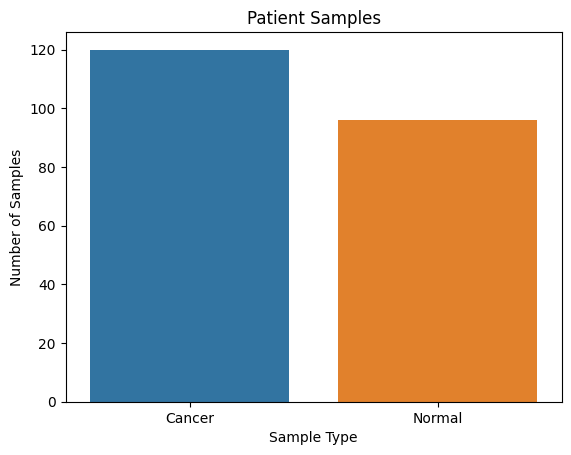

In [9]:
### Question 1 ###
# Read CSV file
data = pd.read_csv('ovarian_cancer.csv')
# Plot data
sns.barplot(x = data['status'].value_counts().index, y = data['status'].value_counts().values).set(title = 'Patient Samples',
                                                                                                   xlabel = 'Sample Type',
                                                                                                   ylabel = 'Number of Samples')
print('Number of genes measured:', data.shape[1] - 2)

In [ ]:
### Question 2 ###
# Plot data
plt.figure(1)
sns.histplot(data = data, x = 'gene_1', hue = 'status',  multiple = 'stack').set(title = 'Distribution of gene_1',
                                                                                 xlabel = 'gene_1',
                                                                                 ylabel = 'Frequency')
plt.figure(2)
sns.histplot(data = data, x = 'gene_3002', hue = 'status',  multiple = 'stack').set(title = 'Distribution of gene_3002',
                                                                                    xlabel = 'gene_3002',
                                                                                    ylabel = 'Frequency')
df = data.groupby(by = 'status').mean(numeric_only = True)
# Calculating the log2 fold change of both genes
print('log2 fold change of gene_1:', np.log2(df['gene_1'].loc['Normal'] / df['gene_1'].loc['Cancer']))
print('log2 fold change of gene_3002:', np.log2(df['gene_3002'].loc['Normal'] / df['gene_3002'].loc['Cancer']))

In [ ]:
### Question 2(a) ###
# Package
from scipy.stats import ttest_ind
# Split data into subgroups
normalGroup = data.loc[data['status'].isin(['Normal'])]
cancerGroup = data.loc[data['status'].isin(['Cancer'])]
# Perform t-test
print('gene_1:', ttest_ind(normalGroup['gene_1'], cancerGroup['gene_1']))
print('gene_3002:', ttest_ind(normalGroup['gene_3002'], cancerGroup['gene_3002']))

In [ ]:
### Question 2(b) ###
# Package
from scipy.stats import mannwhitneyu
# Perform Mann-Whitney U test
print('gene_1:', mannwhitneyu(normalGroup['gene_1'], cancerGroup['gene_1']))
print('gene_3002:', mannwhitneyu(normalGroup['gene_3002'], cancerGroup['gene_3002']))

# III Population dynamics: predator prey
The predator–prey problem refers to an ecological system in which we have two species, one of which feeds on the other. This type of system has been studied for decades and is known to exhibit interesting dynamics. We will visualize the evolution of these populations over time and with respect to each other, and explore the system's equilibrium points. 
<br>
<br>
1. Implement the following population dynamics model:
\begin{align}
\dot{x} & = rx\left(1-\frac{x}{k}\right)-\frac{axy}{c+x},\quad x \geq 0. \\
\dot{y} & = \frac{baxy}{c+x}-dy,\quad y \geq 0. \\
\end{align}
The parameter values are $a = 3.2$, $b = 0.6$, $c = 50$, $d = 0.56$, $k = 125$, and $r = 1.6$.
<br>
<br>
2. Find the three equilibrium points of the system, by setting $\dot{x} = 0$ and $\dot{y} = 0$ and solving for $x$ and $y$. Note one of equilibrium points is $(0,0)$. 
<br>
<br>
3. Pick points near the equilibrium points solved in 2). (Or you can use initial conditions $(x = 25, y = 20)$, $(x = 1, y = 1)$ , $(x = 20, y = 2)$.
<br>
<br>
    a) Plot a simulation of the two populations as a function of time.
<br>
<br>
    b) Plot a simulation of the two populations plotted against each other. 

In [ ]:
### Question 1 ###
# Implementation of the dynamical system
def func(X, t):
    a = 3.2
    b = 0.6
    c = 50
    d = 0.56
    k = 125
    r = 1.6
    return [r * X[0] * (1 - X[0] / k) - ((a * X[0] * X[1]) / (c + X[0])), 
            ((b * a * X[0] * X[1]) / (c + X[0])) - d * X[1]]

In [ ]:
### Question 3 ###
# Package
from scipy.integrate import odeint
# Time span
t_span = np.linspace(0, 50, 1000)
# Integrating
sol1 = odeint(func, [25, 20], t_span)
# Plot data 1.1
plt.figure(1)
plt.plot(t_span, sol1[:, 1], label = 'predator')
plt.plot(t_span, sol1[:, 0], label = 'prey')
# Plot config 1.1
plt.title('Predator vs. Prey: Time Series')
plt.suptitle('Initial Conditions: [25, 20]', fontsize = 10)
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.grid()
# Plot data 1.2
plt.figure(2)
plt.plot(sol1[:, 0], sol1[:, 1])
# Plot config 1.2
plt.title('Predator vs. Prey: Phase Portrait')
plt.suptitle('Initial Conditions: [25, 20]', fontsize = 10)
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.grid()

In [ ]:
# Integrating
sol2 = odeint(func, [1, 1], t_span)
# Plot data 2.1
plt.figure(1)
plt.plot(t_span, sol2[:, 1], label = 'predator')
plt.plot(t_span, sol2[:, 0], label = 'prey')
# Plot config 2.1
plt.title('Predator vs. Prey: Time Series')
plt.suptitle('Initial Conditions: [1, 1]', fontsize = 10)
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.grid()
# Plot data 2.2
plt.figure(2)
plt.plot(sol2[:, 0], sol2[:, 1])
# Plot config 2.2
plt.title('Predator vs. Prey: Phase Portrait')
plt.suptitle('Initial Conditions: [1, 1]', fontsize = 10)
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.grid()

In [ ]:
# Integrating
sol3 = odeint(func, [20, 2], t_span)
# Plot data 3.1
plt.figure(1)
plt.plot(t_span, sol3[:, 1], label = 'predator')
plt.plot(t_span, sol3[:, 0], label = 'prey')
# Plot config 3.1
plt.title('Predator vs. Prey: Time Series')
plt.suptitle('Initial Conditions: [20, 2]', fontsize = 10)
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.grid()
# Plot data 3.2
plt.figure(2)
plt.plot(sol3[:, 0], sol3[:, 1])
# Plot config 3.2
plt.title('Predator vs. Prey: Phase Portrait')
plt.suptitle('Initial Conditions: [20, 2]', fontsize = 10)
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.grid()